In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier as knn
import seaborn as sns
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [9]:
mnist = pd.read_csv("../Dataset/mnist_train.csv")
mnist_test = pd.read_csv("../Dataset/mnist_test.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_test, y_test =  mnist_test.iloc[:, 1:].values, mnist_test.iloc[:, 0].values
print(x_test.shape, y_test.shape)

(10000, 784) (10000,)


In [12]:
x_train, y_train =  mnist.iloc[:, 1:].values, mnist.iloc[:, 0].values
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [13]:
# ohe = OneHotEncoder(sparse=False)
# y_train = ohe.fit_transform(y_train.reshape(-1,1))

In [14]:
# nfigs = 5
# fig = plt.figure(figsize=(10,10))
# for i in range(nfigs ** 2):
# ax = fig.add_subplot(nfigs, nfigs, i+1)
# ax.imshow(x_train[i].reshape(28, 28))

In [15]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [16]:
kVals = np.arange(3,100,2)
accuracies = []

for k in kVals:
    model = knn(n_neighbors= k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)
    print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9705
K = 5; Accuracy: 0.9688
K = 7; Accuracy: 0.9694
K = 9; Accuracy: 0.9659
K = 11; Accuracy: 0.9668
K = 13; Accuracy: 0.9653
K = 15; Accuracy: 0.9633
K = 17; Accuracy: 0.963
K = 19; Accuracy: 0.9632
K = 21; Accuracy: 0.963
K = 23; Accuracy: 0.9619
K = 25; Accuracy: 0.9609
K = 27; Accuracy: 0.9604
K = 29; Accuracy: 0.9593
K = 31; Accuracy: 0.9591
K = 33; Accuracy: 0.9584
K = 35; Accuracy: 0.9578
K = 37; Accuracy: 0.9571
K = 39; Accuracy: 0.9561
K = 41; Accuracy: 0.9564
K = 43; Accuracy: 0.9556
K = 45; Accuracy: 0.9551
K = 47; Accuracy: 0.9542
K = 49; Accuracy: 0.9538
K = 51; Accuracy: 0.9533
K = 53; Accuracy: 0.9527
K = 55; Accuracy: 0.9528
K = 57; Accuracy: 0.9521
K = 59; Accuracy: 0.9513
K = 61; Accuracy: 0.9509
K = 63; Accuracy: 0.9509
K = 65; Accuracy: 0.9497
K = 67; Accuracy: 0.9492
K = 69; Accuracy: 0.9488
K = 71; Accuracy: 0.9485
K = 73; Accuracy: 0.9483
K = 75; Accuracy: 0.9474
K = 77; Accuracy: 0.9474
K = 79; Accuracy: 0.947
K = 81; Accuracy: 0.9467
K = 83;

Text(0, 0.5, 'Accuracy')

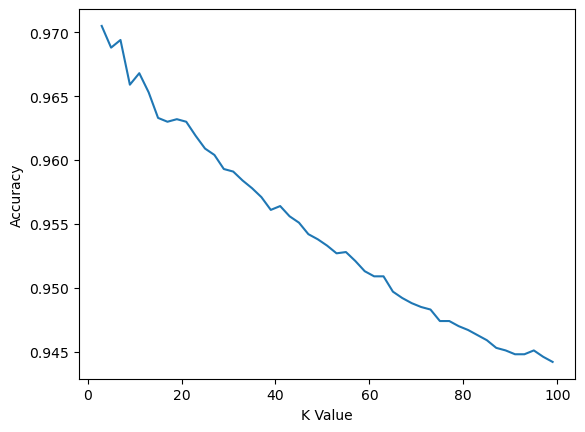

In [17]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [18]:
model = knn(n_neighbors= 3)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [19]:
from sklearn.metrics import classification_report as cr 
from sklearn.metrics import confusion_matrix as cm

In [20]:
print(cr(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



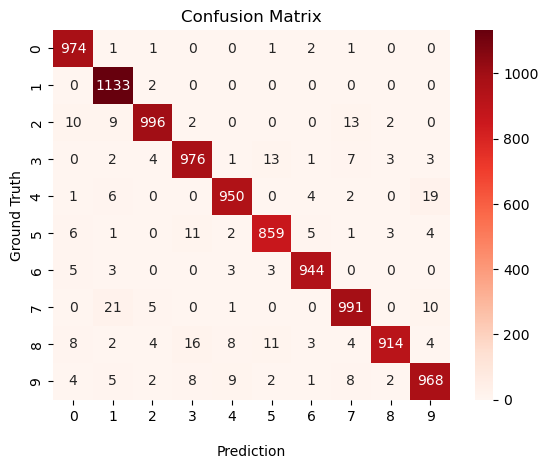

In [21]:
confusion_matrix = cm(y_test,pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

In [22]:
confusion_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]],
      dtype=int64)